# Red Wine Quality Prediction

###### Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

###### Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcoholOutput variable (based on sensory data):

12 - quality (score between 0 and 10)

# Import all needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset 

In [2]:
wine=pd.read_csv('wine.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## About the columns:

1.fixed acidity

In this column fixed acidity will given and it is in float type.

2.volatile acidity

In this column volatile acidity will given and it is in float type .

3.citric acid 

In this column citric acid will given and it is in float type .

4.residual sugar

In this column residual sugar value is given and it is in float type .

5.chlorides

In this column chlorides value is given and it is in float type .

6.free sulfur dioxide

In this column free sulfur dioxide value is given and it is in float type .

7.total sulfur dioxide

In this column total sulfur dioxide value is given and it is in float type .

8.density

In this column density value is given and it is in float type .

9.pH

In this column pH value is given and it is in float type .

10.sulphates

In this column sulphates value is given and it is in float type .

11.alcohol

In this column alcohol value is given and it is in float type .

12.quality

This is Target column and quality wine b/w 1 to 10. 

# Exploratory Data Analysis(EDA)

### Checking Null Values in DataFrame

In [5]:
#checking null values in all columns
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking shape of the dataframe

In [6]:
wine.shape

(1599, 12)

There are 1599 rows and 12 columns are there.

### Checking Datatypes of all columns

In [7]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

we have to observe the quality column and quality is the target variable. So predict the quality of the wine.

In [8]:
#checking unique of quality variable
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

If you observe here , There are 6 types of quality wines.

They are 3,4,5,6,7 and 8 quality wine.

In [9]:
#checking information of all columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


If we observe the above RangeIndex means number of rows in Dataset (1599 rows) and 12 columns are here. And also we observe each column deatils like total rows,null values and Datatype also

If seen they are 11 columns are Float type and target column in Integer type and memory usage is : 150.0 KB

### Summary Statistics

In [10]:
#describe the all columns
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Here you can observe count,mean,std,min,max,25%,50%,75% of all columns or variables.

key observations:

1.free sulfur dioxide and total sulfur dioxide variables (columns) as high std . There is a chance of high outliers.

2.if you observe total sulfur dioxide mean and 50% there is large diff are there . There is chance of high skewness.

3.free sulfur dioxide and total sulfur dioxide variables (columns) 75% and max values high diff .so, There is a chance of high outliers.

In [21]:
#checking uniques of quality variable
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [22]:
#value counts of each quality
wine['quality'].value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

## Observations:

1.if you observe here high quality wine is 8 and low is 3 and remaining 4,5,6,7 are medium quality

2.Here low quality wine and high quality wine rows are very less

## Apply SMOTE for make Balance DataFrame

if the dataframe is imbalance we have to apply SMOTE for balance the dataframe

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smt=SMOTE()

In [25]:
wine_x=wine.iloc[:,0:-1]
wine_y=wine.iloc[:,-1]

In [26]:
x,y=smt.fit_resample(wine_x,wine_y)

copy indepedent variables into wine

In [27]:
wine=x

Add target varible wine dataframe

In [28]:
wine['quality']=y

In [29]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,5.832120,0.501552,0.038664,1.872200,0.047032,28.866400,80.935198,0.991287,3.494224,0.808448,13.812280,8
4082,9.805188,0.377963,0.513222,2.152594,0.070559,6.118516,16.000000,0.995757,3.183555,0.672370,11.838887,8
4083,10.589321,0.500307,0.628855,4.302300,0.083756,6.000000,18.251917,0.997902,3.193817,0.776030,12.764129,8
4084,7.425039,0.370355,0.358223,2.514375,0.063073,15.000000,31.571876,0.995549,3.268578,0.792148,11.782227,8


#### finding Correlation with each other

In [30]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.299491,0.726041,0.109588,0.113452,-0.135034,-0.131330,0.657765,-0.712260,0.196230,-0.143327,0.144900
volatile acidity,-0.299491,1.000000,-0.632111,0.073114,0.195404,-0.186021,-0.126722,0.080456,0.464908,-0.460449,-0.266994,-0.682230
citric acid,0.726041,-0.632111,1.000000,0.096168,0.126097,0.001993,0.046038,0.325472,-0.689902,0.436676,0.128239,0.440763
residual sugar,0.109588,0.073114,0.096168,1.000000,0.012071,-0.002957,0.088353,0.322973,-0.028727,-0.032662,0.087275,-0.034455
chlorides,0.113452,0.195404,0.126097,0.012071,1.000000,0.002763,-0.028232,0.273239,-0.197345,0.243522,-0.342894,-0.332507
free sulfur dioxide,-0.135034,-0.186021,0.001993,-0.002957,0.002763,1.000000,0.712660,-0.123173,0.018480,0.182255,0.025700,0.117649
total sulfur dioxide,-0.131330,-0.126722,0.046038,0.088353,-0.028232,0.712660,1.000000,-0.044063,-0.045775,0.133076,-0.062960,0.057778
density,0.657765,0.080456,0.325472,0.322973,0.273239,-0.123173,-0.044063,1.000000,-0.320004,0.024191,-0.592928,-0.336831
pH,-0.712260,0.464908,-0.689902,-0.028727,-0.197345,0.018480,-0.045775,-0.320004,1.000000,-0.304095,0.145836,-0.313429
sulphates,0.196230,-0.460449,0.436676,-0.032662,0.243522,0.182255,0.133076,0.024191,-0.304095,1.000000,0.239349,0.456353


if you see correlation in heatmap, It will easy to understand .So, we see corrleation more in Data Visualization.

# Data visualization

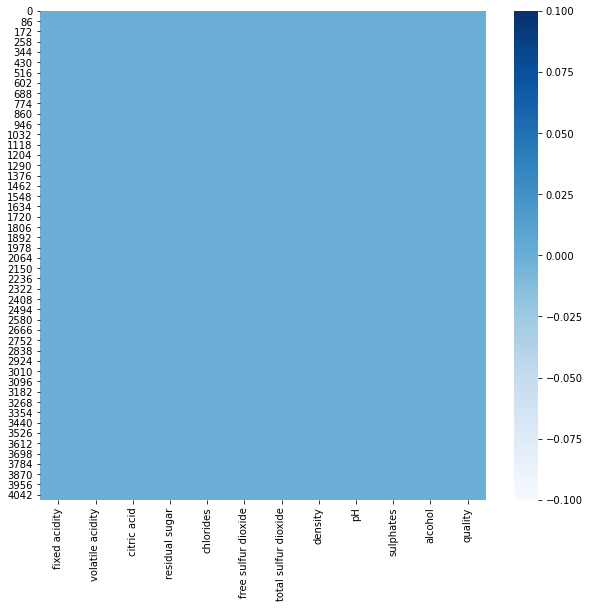

In [31]:
#checking null values using heatmap
plt.figure(figsize=(10,9))
sns.heatmap(wine.isnull(),cmap='Blues')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

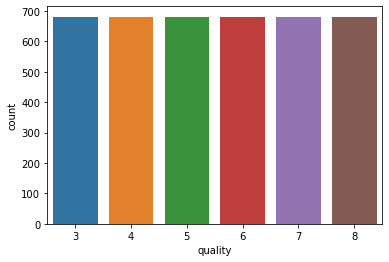

In [32]:
#countplot
sns.countplot('quality',data=wine)

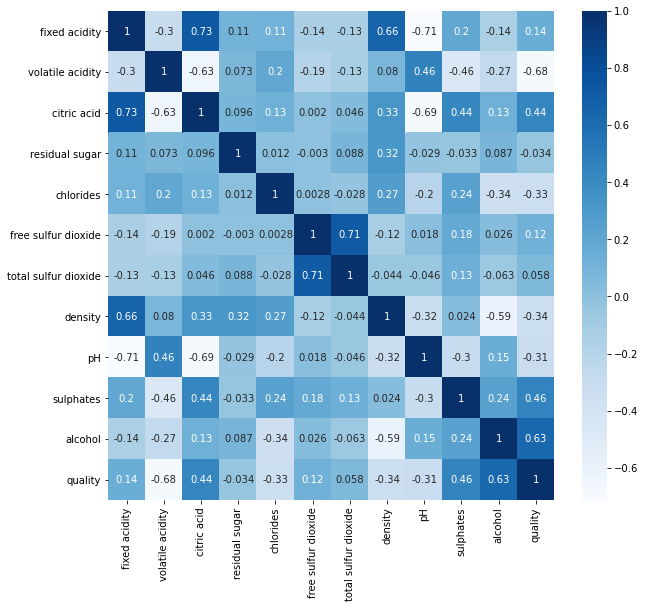

In [33]:
#checking correlation using heatmap
plt.figure(figsize=(10,9))
sns.heatmap(wine.corr(),annot=True,cmap='Blues')
plt.show()

###### key observations:

1. Alcohol is good correlation with quality of the wine.
2. if alcohol is increase quality of the wine also increase.
3.volatile acidity are negative correlation with quality of the wine.

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

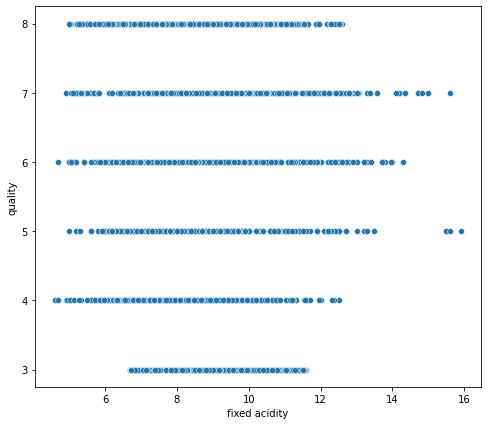

In [34]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='fixed acidity',y='quality',data=wine)

if you observe fixed acidity is avg in high and low quality of wine . if the fixed acidity is very high means quality of wine is 4,5,6,7.

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

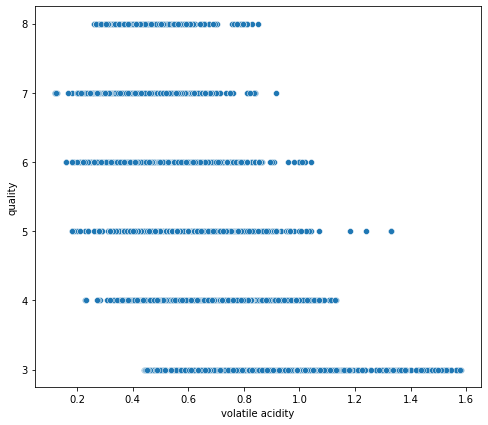

In [35]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='volatile acidity',y='quality',data=wine)

if you observe volatile acidity is high means quality of wine is descrese

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

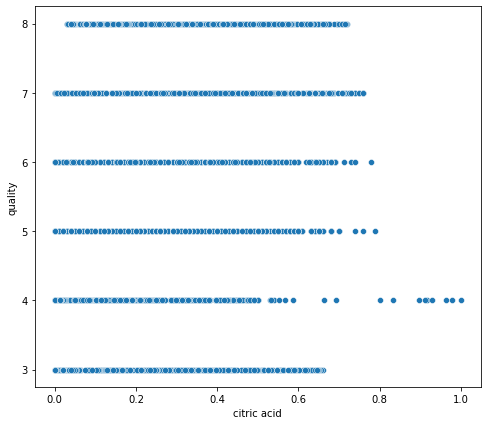

In [36]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='citric acid',y='quality',data=wine)

In wine there no citric acid means the quality of wine is medium are high. 

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

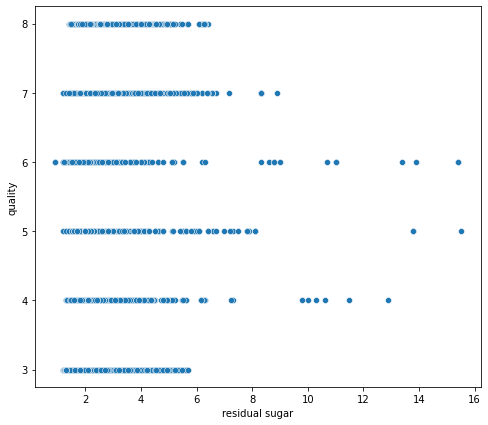

In [37]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='residual sugar',y='quality',data=wine)

if you observe above scatter plot in that residual sugar is low means the quality of wine is high or low .if residual sugar is high means quality of wine is medium.

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

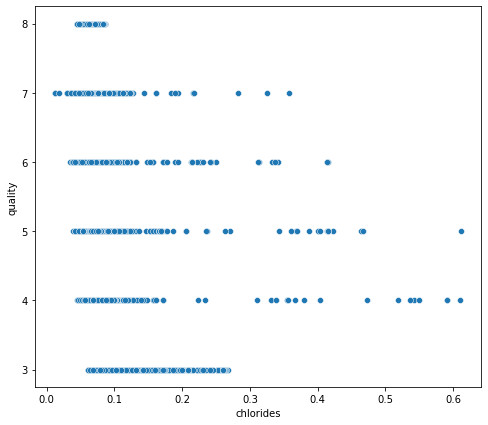

In [38]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='chlorides',y='quality',data=wine)

if you observe low chlorides means the quality of wine is high.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

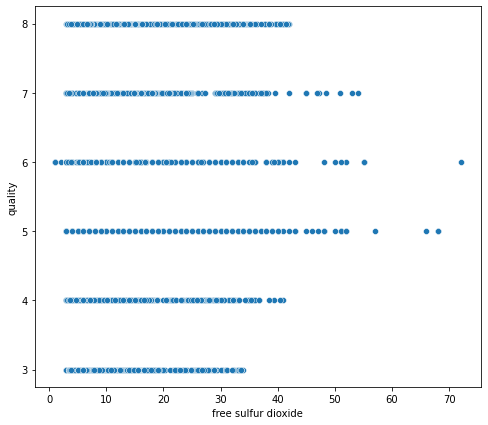

In [39]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='free sulfur dioxide',y='quality',data=wine)

if low or no free sulfur dioxide means quality of wine is medium or high.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

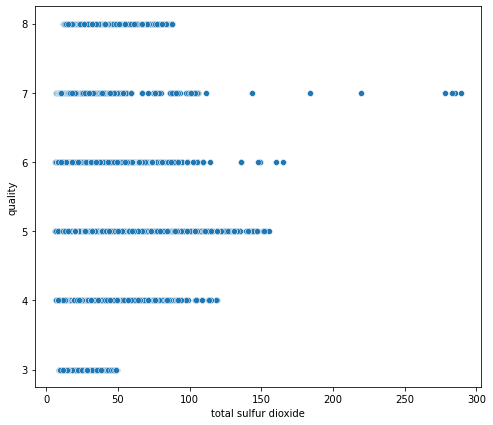

In [40]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='total sulfur dioxide',y='quality',data=wine)

if low total sulfur dioxie means the quality of wine is high or low.

<AxesSubplot:xlabel='density', ylabel='quality'>

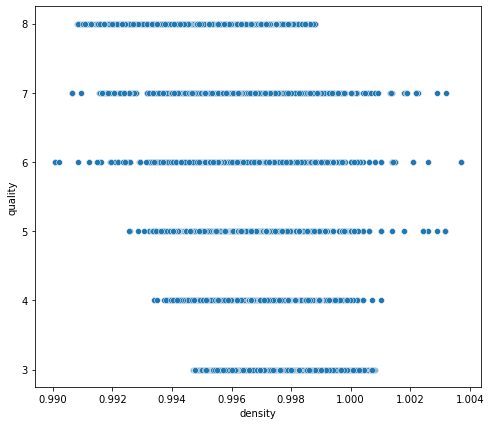

In [41]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='density',y='quality',data=wine)

if low density means the quality of wine is increase.

<AxesSubplot:xlabel='pH', ylabel='quality'>

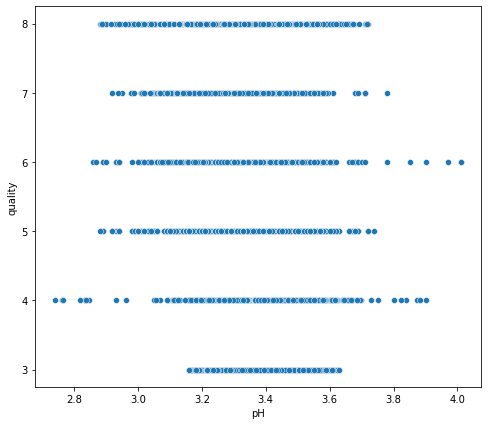

In [42]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='pH',y='quality',data=wine)

if the pH value is very high means the quality of wine is medium.

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

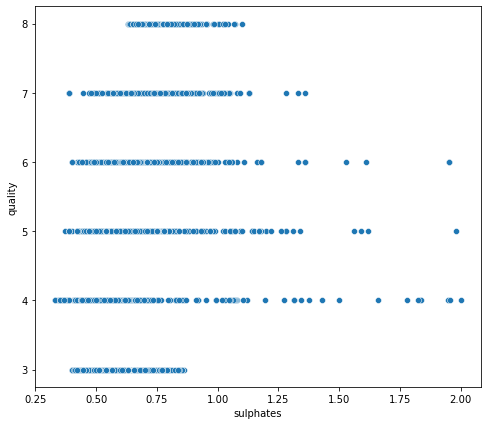

In [43]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='sulphates',y='quality',data=wine)

if high sulphates means quality of wine is medium

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

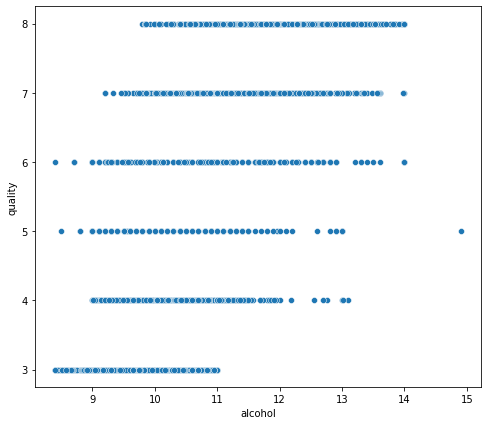

In [44]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='alcohol',y='quality',data=wine)

if alcohol is high means quality of wine is high.

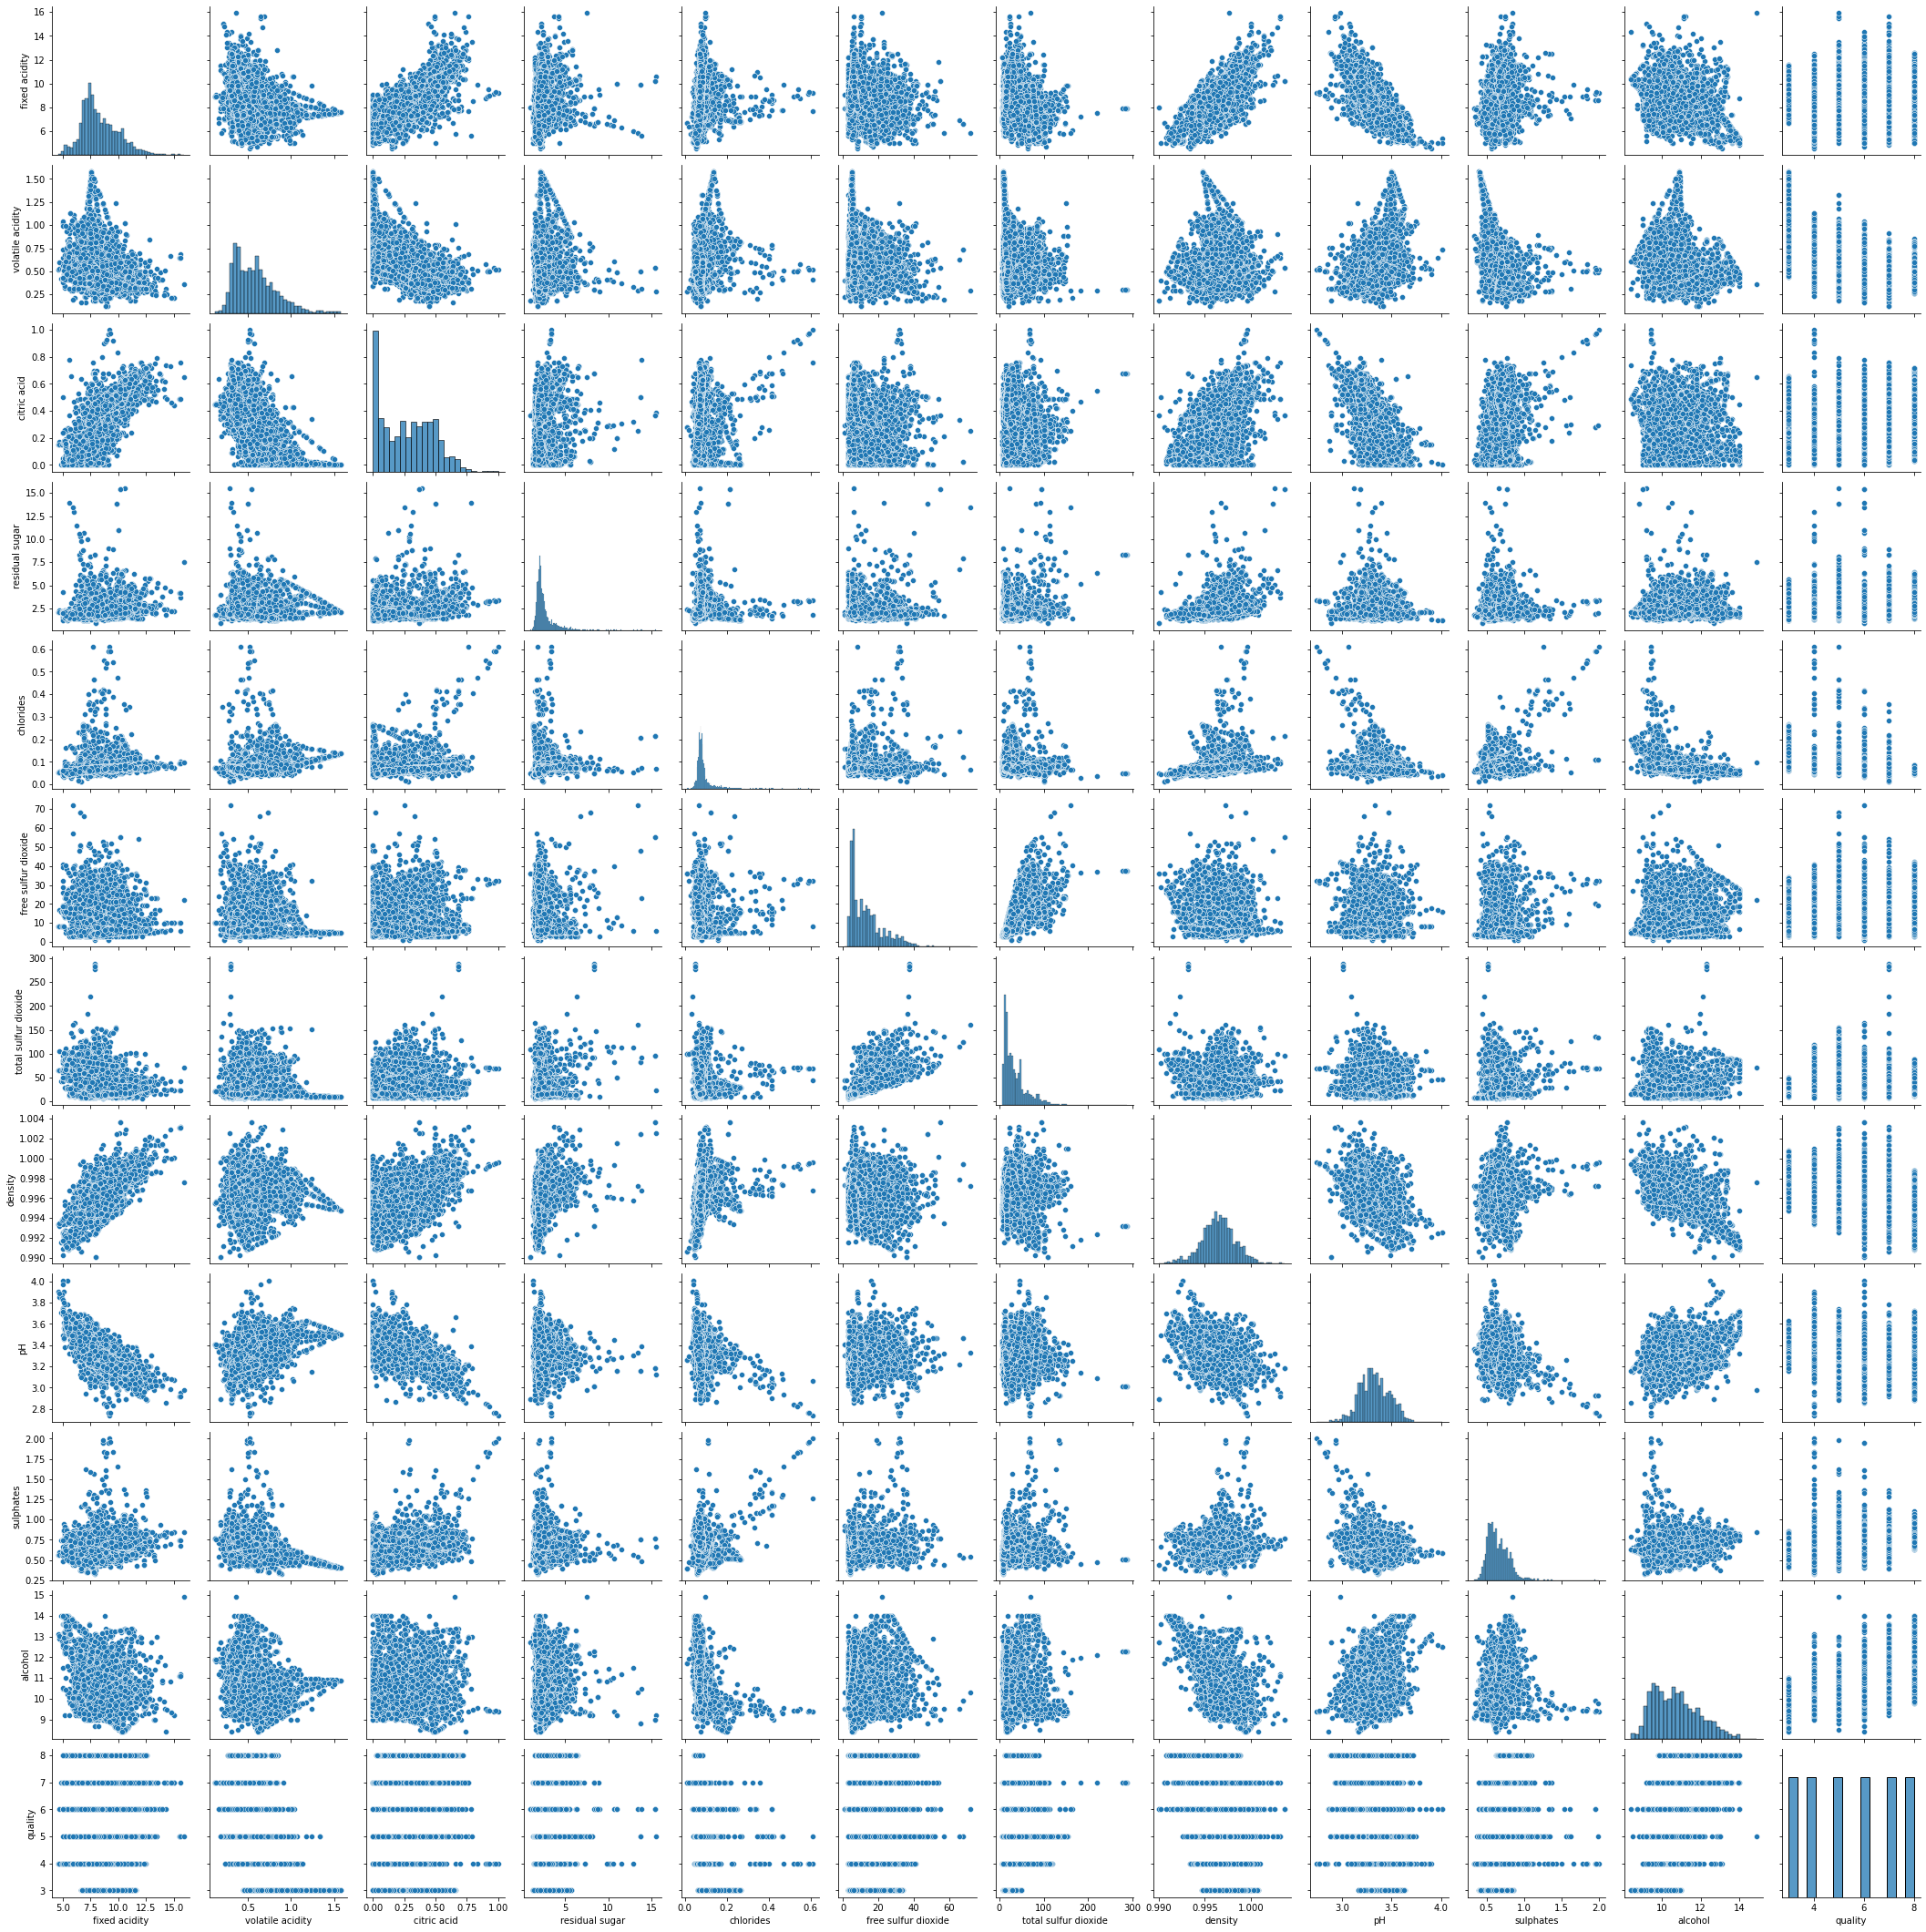

In [45]:
#pair plot
sns.pairplot(wine)

###### for checking outliers in all columns

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

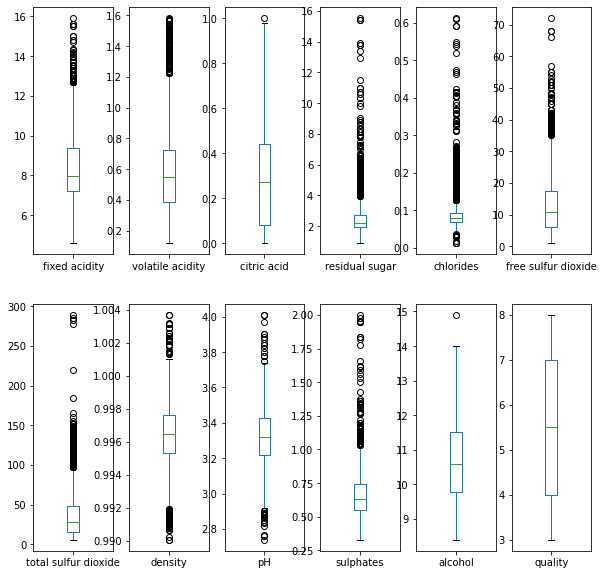

In [46]:
wine.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

if you observe there are many outliers in fixed acidity ,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide and density.

#### To check Distribution of skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

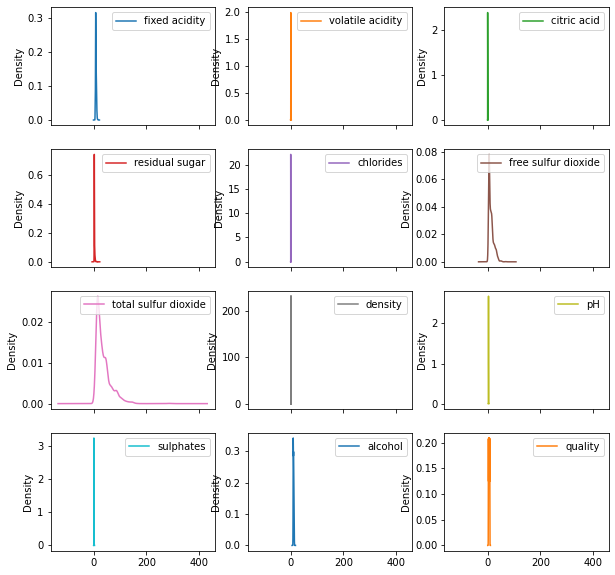

In [47]:
wine.plot(kind='kde',subplots=True,layout=(4,3),figsize=(10,10))

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

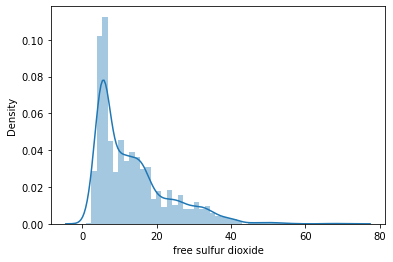

In [48]:
sns.distplot(wine['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

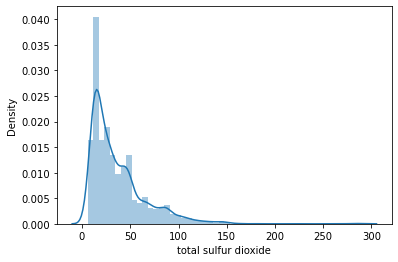

In [49]:
sns.distplot(wine['total sulfur dioxide'])

#### Data Cleansing

###### As we observe in EDA process volatile acidity is negativly correlated with quality of wine

In [50]:
#droping volatile acidity column
wine.drop('volatile acidity',axis=1,inplace=True)

In [51]:
wine

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...
4081,5.832120,0.038664,1.872200,0.047032,28.866400,80.935198,0.991287,3.494224,0.808448,13.812280,8
4082,9.805188,0.513222,2.152594,0.070559,6.118516,16.000000,0.995757,3.183555,0.672370,11.838887,8
4083,10.589321,0.628855,4.302300,0.083756,6.000000,18.251917,0.997902,3.193817,0.776030,12.764129,8
4084,7.425039,0.358223,2.514375,0.063073,15.000000,31.571876,0.995549,3.268578,0.792148,11.782227,8


###### There are many outliers we have to remove outliers

In [52]:
from scipy.stats import zscore

In [53]:
z=np.abs(zscore(wine))

In [54]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   14,   15,   15,   17,   17,   19,   33,   42,   43,
         45,   57,   81,   81,   83,   83,   86,   86,   88,   88,   90,
         91,   91,   92,   92,   95,  106,  106,  109,  130,  145,  147,
        151,  151,  151,  151,  154,  155,  156,  157,  163,  164,  169,
        169,  181,  188,  189,  190,  192,  201,  219,  226,  226,  240,
        243,  244,  258,  258,  274,  278,  281,  291,  294,  313,  324,
        325,  328,  339,  340,  347,  353,  354,  364,  366,  374,  378,
        381,  391,  396,  396,  396,  400,  400,  400,  413,  415,  415,
        417,  442,  442,  451,  463,  480,  480,  494,  497,  501,  502,
        509,  515,  515,  522,  522,  523,  541,  544,  544,  554,  554,
        555,  555,  557,  557,  568,  584,  591,  595,  608,  614,  634,
        636,  637,  639,  649,  649,  651,  652,  652,  652,  672,  678,
        680,  684,  692,  692,  694,  695,  723,  723,  730,  741,  754,
        771,  772,  776,  777,  791,  795,  836,  

In [55]:
wine_new=wine[(z<3).all(axis=1)]

In [56]:
wine_new.shape

(3817, 11)

After removing outliers in dataframe remaining 3795 rows 

In [57]:
wine=wine_new

#### Removing skewness

if you observe above EDA process free sulfur dioxide and total sulfur dioxide is high skewness

In [58]:
#import boxcox for removing skewness
from scipy.stats import boxcox

In [59]:
#wine['free sulfur dioxide']=boxcox(wine['free sulfur dioxide'],0)
#wine['total sulfur dioxide']=boxcox(wine['total sulfur dioxide'],0)

In [60]:
wine['quality'].value_counts()

8    674
3    657
4    648
7    632
6    624
5    582
Name: quality, dtype: int64

# Some preprocessing techniques

In [62]:
x=wine.iloc[:,0:-1]
y=wine.iloc[:,-1]

In [63]:
x.shape

(3817, 10)

In [64]:
y.shape

(3817,)

### Variance Inflation Factor(VIF)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
x.shape[1]

10

In [70]:
def vif():
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factors']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [71]:
vif()

,variables,VIF factors
0,fixed acidity,109.141488
1,citric acid,9.718047
2,residual sugar,10.503602
3,chlorides,12.740218
4,free sulfur dioxide,6.954609
5,total sulfur dioxide,6.750525
6,density,1857.148307
7,pH,1375.447491
8,sulphates,38.119463
9,alcohol,144.843397


if you observe here free sulfur dioxide and total sulfur dioxide is same

In [75]:
x.drop('free sulfur dioxide',axis=1,inplace=True)

In [76]:
vif()

,variables,VIF factors
0,fixed acidity,108.665842
1,citric acid,9.648122
2,residual sugar,10.250430
3,chlorides,12.728253
4,total sulfur dioxide,3.362642
5,density,1845.592995
6,pH,1372.199354
7,sulphates,37.683771
8,alcohol,142.473875


if you observe here citric acid and residual sugar in same so drop one of them

In [77]:
x.drop('citric acid',axis=1,inplace=True)

In [79]:
vif()

,variables,VIF factors
0,fixed acidity,76.625198
1,residual sugar,10.232706
2,chlorides,12.721392
3,total sulfur dioxide,3.312487
4,density,1839.032735
5,pH,1253.063283
6,sulphates,35.220411
7,alcohol,129.363066


### preprocessing

Using standard scaler to convert data in one scale

In [205]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [206]:
x=scale.fit_transform(x)

## model selection process

 import some classification models

In [207]:
#Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [208]:
#data divided into train data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

In [209]:
#checking shape of x_train
x_train.shape

(2671, 8)

In [210]:
#checking shape of x_test
x_test.shape

(1146, 8)

In [211]:
#checking shape of y_train
y_train.shape

(2671,)

In [212]:
#checking shape of y_test
y_test.shape

(1146,)

In [213]:
dtc=DecisionTreeClassifier(criterion='entropy')
knc=KNeighborsClassifier()
svc=SVC(kernel='rbf')
rfc=RandomForestClassifier()

In [214]:
list1=[dtc,knc,svc,rfc]

In [215]:
for model in list1:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print('accuracy score:',accuracy_score(pred,y_test))
    print('Confusion matrix:')
    print(confusion_matrix(pred,y_test))
    print('\n')
    print('Classification Report:')
    print(classification_report(pred,y_test))
    print('--->--->--->--->--->--->--->--->--->--->--->--->--->--->')

DecisionTreeClassifier(criterion='entropy')
accuracy score: 0.7905759162303665
Confusion matrix:
[[201   0   6   2   1   0]
 [  1 146  20  15   0   0]
 [  5  16  90  32   7   0]
 [  3  14  31 110  37   3]
 [  0   4   4  23 162   4]
 [  0   0   0   5   7 197]]


Classification Report:
              precision    recall  f1-score   support

           3       0.96      0.96      0.96       210
           4       0.81      0.80      0.81       182
           5       0.60      0.60      0.60       150
           6       0.59      0.56      0.57       198
           7       0.76      0.82      0.79       197
           8       0.97      0.94      0.95       209

    accuracy                           0.79      1146
   macro avg       0.78      0.78      0.78      1146
weighted avg       0.79      0.79      0.79      1146

--->--->--->--->--->--->--->--->--->--->--->--->--->--->
KNeighborsClassifier()
accuracy score: 0.7757417102966842
Confusion matrix:
[[210   1   7   4   2   0]
 [  0 171  3

In [217]:
for model in list1:
    score=cross_val_score(model,x,y,cv=10)
    print(model)
    print(score)
    print(score.mean())
    print('--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->')

DecisionTreeClassifier(criterion='entropy')
[0.69895288 0.73298429 0.7565445  0.71465969 0.76439791 0.7486911
 0.7434555  0.75065617 0.74015748 0.74540682]
0.7395906336315291
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
KNeighborsClassifier()
[0.72251309 0.76701571 0.73298429 0.7460733  0.7591623  0.76963351
 0.7617801  0.79527559 0.75853018 0.76115486]
0.757412293358618
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
SVC()
[0.70157068 0.7460733  0.70942408 0.72513089 0.70680628 0.72774869
 0.71989529 0.7191601  0.7191601  0.72703412]
0.7202003545368347
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
RandomForestClassifier()
[0.79581152 0.82198953 0.79319372 0.81675393 0.80890052 0.83769634
 0.83246073 0.82152231 0.80839895 0.81627297]
0.8153000508444297
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->


### Save the model

In [176]:
import joblib

In [177]:
#save the model
joblib.dump(rfc,'red_wine_quality_rfc.obj')

['red_wine_quality_rfc.obj']

In [178]:
#load the model
rfc_load=joblib.load('red_wine_quality_rfc.obj')

In [179]:
#checking that model is working or not.
rfc_load.predict(x_test)

array([3, 8, 3, ..., 3, 4, 8], dtype=int64)